# First attempt at predicting telecom churn
- Seeing how churn rate relates to international plan feature.
- Using a `crosstab`and visual analysis with `Seaborn`

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.precision", 2)

In [22]:
DATA_PATH = "/mnt/hdmenezess42/GitProjects/MLCourseAI/data/"

In [23]:
df = pd.read_csv(f"{DATA_PATH}telecom_churn.csv")

In [24]:
df["Churn"] = df["Churn"].astype("int64")

In [33]:
d = {"No": False, "Yes": True} 
df["International plan"] = df["International plan"].map(d)

In [34]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


<Axes: xlabel='International plan', ylabel='count'>

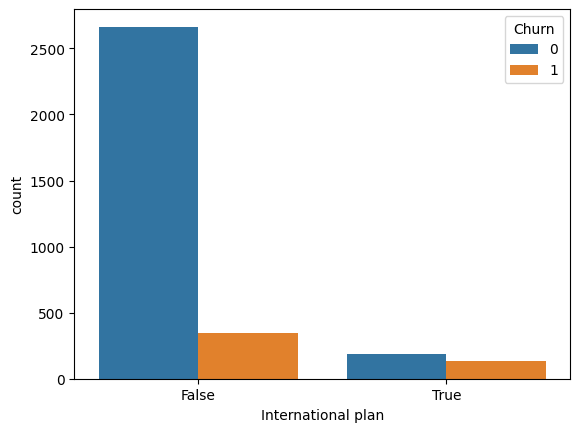

In [35]:
sns.countplot(x="International plan", hue="Churn", data=df)

We can see that the ratio between churn and international plan is expressive.
perhaps, high and poorly managed expenses for international calls cause confflicts and result in discontent among the telecom operator's customers

Let's look at another important feature - Customer service calls

In [36]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True) 

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<Axes: xlabel='Customer service calls', ylabel='count'>

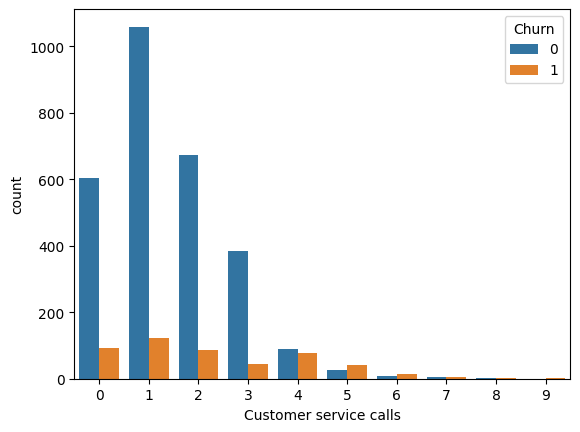

In [37]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

We can see that the rate increases sharply from 4 customer service calls and above

Now let's add a binary feature to our DataFrame - `Customer service calls > 3`

In [38]:
df["Many_service_calls"] = (df["Customer service calls"]>3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<Axes: xlabel='Many_service_calls', ylabel='count'>

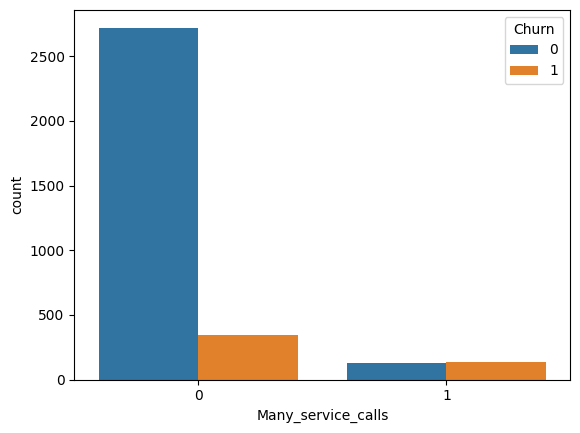

In [39]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df)

relating Churn with both the international plan and the freshly created Many_service_calls

In [40]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333
